# How to plot NetCDF Files with Magics

This tutorial will give view an overview of the possibilities offered by Magics to interpret and plot some NetCDF data.

You will have to create a netcdf object to help Magics to extract and interpret the data you want to plot. 
A list of the available parameters can be found in the <a href='https://software.ecmwf.int/wiki/display/MAGP/Netcdf+Input'> NetCDF Action Documentation</a><br>

This action will be combined with a projection definition, and a visualisation action to create a plot.

Magics can handle 2 type of geo-referenced NetCDF:
<li> <b>geomatrix</b>: A geomatrix is a regular matrix, defined by 2 vectors [ 1 for latitudes, 1 for longitudes] </li>
<li> <b>complex_matrix</b>: A complex_matrix is defined by 2 matrices [1 2D-Matrix describing the latitudes, and 1 2D-Matrix defining the longitudes] </li>

But, let's try an example.

We have NetCDF file : 
A simple ncdump will give the following information
<pre>
netcdf data {
dimensions:
	longitude = 360 ;
	latitude = 181 ;
	time = 1 ;
variables:
		float longitude(longitude) ;
		longitude:units = "degrees_east" ;
		longitude:long_name = "longitude" ;
	float latitude(latitude) ;
		latitude:units = "degrees_north" ;
		latitude:long_name = "latitude" ;
	int level(level) ;
		level:units = "millibars" ;
		level:long_name = "pressure_level" ;
	int time(time) ;
		time:units = "hours since 1900-01-01 00:00:0.0" ;
		time:long_name = "time" ;
		time:calendar = "gregorian" ;
	short t(time, level, latitude, longitude) ;
		t:_FillValue = -32767s ;
		t:missing_value = -32767s ;
		t:units = "K" ;
		t:long_name = "Temperature" ;
		t:standard_name = "air_temperature", 

// global attributes:
		:Conventions = "CF-1.6" ;
		:history = "2016-09-16 16:52:53 GMT by grib_to_netcdf-1.15.0" ;
}
</pre>

This simple example contains a regular field <i>t</i>, the geo-referencement is described by the 2 variables <i> latitude</i> and <i> longitude </i>.
Let's pass this information to Magics through a <b>mnetcdf</b> object.


First we import the Magics.macro package.

In [1]:
import Magics.macro as magics

Now, we have to define the geographical area we want to see in our final plot. Let's say that we focus on Europe in a geographical projection ..
We need to create :
    <li> a <a href='https://software.ecmwf.int/wiki/display/MAGP/Subpage+-+Projection'> mmap object </a> to setup the geographical projection </li>
    <li> a <a href='https://software.ecmwf.int/wiki/display/MAGP/Coastlines'> mcoast object </a> to plot some coastlines </a> </li>



In [2]:
area = magics.mmap(
      subpage_map_projection = "cylindrical",
      subpage_lower_left_latitude = 30.00,
      subpage_lower_left_longitude = -20.00,
      subpage_upper_right_latitude = 60.00,
      subpage_upper_right_longitude = 20.00
)

coast = magics.mcoast(map_coastline_land_shade = "on",
          map_coastline_land_shade_colour = "grey",
                      map_boundaries = "on",
  map_boundaries_colour = "rgb(0.28,0.38,0.72)",
  map_grid_latitude_increment = 5.00,
  map_grid_longitude_increment = 5.00
        )

Now that these 2 objects have been created, we combine them in a plot command :

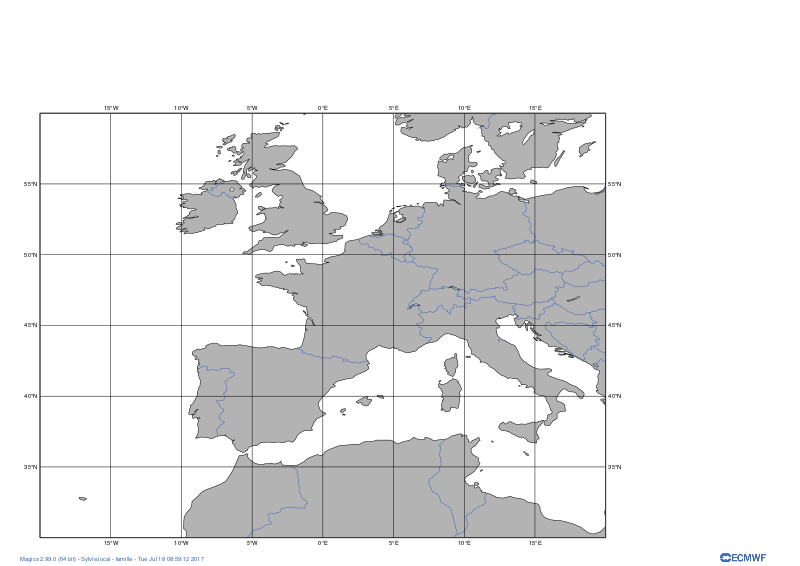

In [3]:
magics.plot(area, coast)

Note, that you have to define the area before anything else, this will allow Magics to setup its working environment and extract the relevant information from the data. 
You can experiment setting the area, and playing with the different options of the <i>mcoast</i> object.

Now that you are happy, let's add our data: It important to define the name of the variable you want to extract from the NetCDF and the names of the variables that describe the geo-referencement. 

In [4]:
data = magics.mnetcdf(netcdf_type = "geomatrix",
  netcdf_filename = "ERA5_00.nc",
  netcdf_value_variable = "t2m",
  netcdf_dimension_setting = ["time:2013-09:2015-12"],
  netcdf_dimension_setting_method = "value",                    
  netcdf_latitude_variable = "latitude",
  netcdf_longitude_variable = "longitude"
)

Next step is to define some visual attributes. To apply a contour, you have to create a <a href ='https://software.ecmwf.int/wiki/display/MAGP/Contouring' > mcont object </a>. This object comes with a long list of options to setup contour intervals, colour, shading, etc.
We start simple by just changing the colour of the isolines. 

In [5]:
contour = magics.mcont(contour_line_colour = "red")

To get a plot, we add these new objects into the plot command.

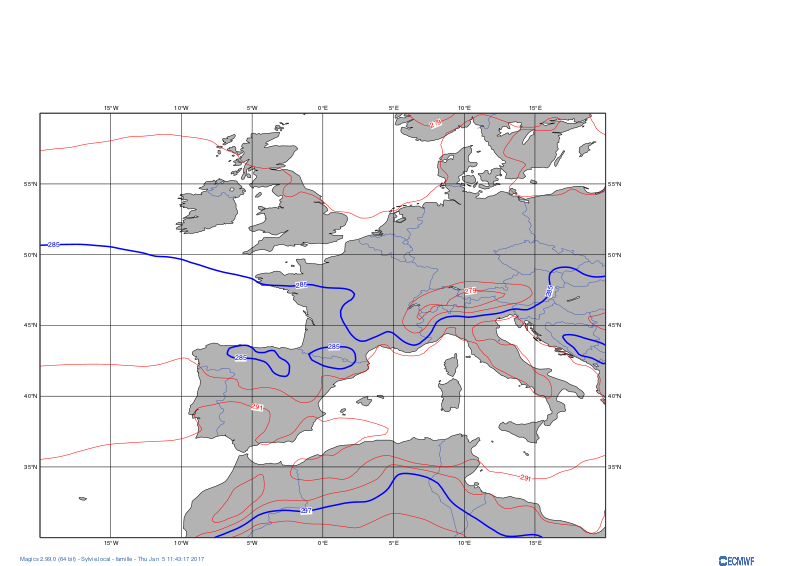

In [38]:
magics.plot(area, coast, data, contour)

What are this blue lines ? we asked for red! 
Magics has a concept of highlight isolines. Every nth isolines, Magics will use a different style/colour/thickness toplot the line.
You can :
<li> Turn that option off </li>

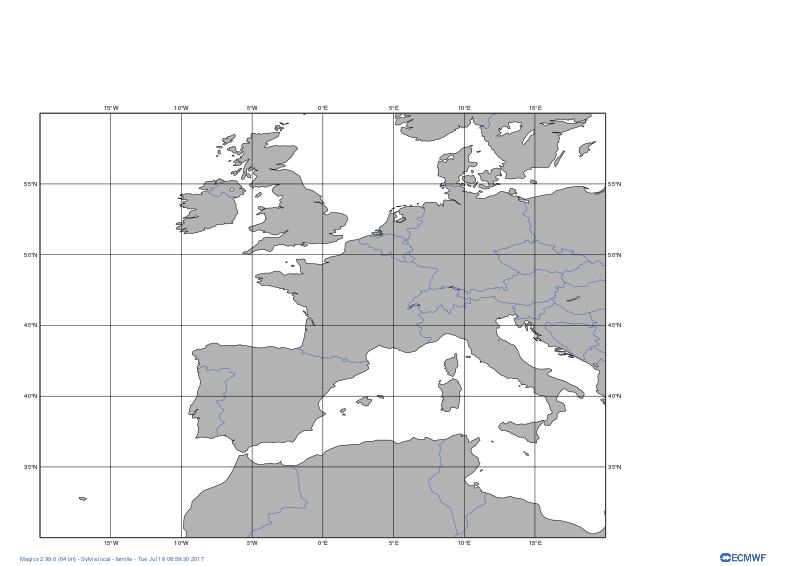

In [6]:
contour = magics.mcont(contour_line_colour = "green",
               contour_highlight = "off")
magics.plot(area, coast, data, contour)

<li>Or define your own highlight style</li>

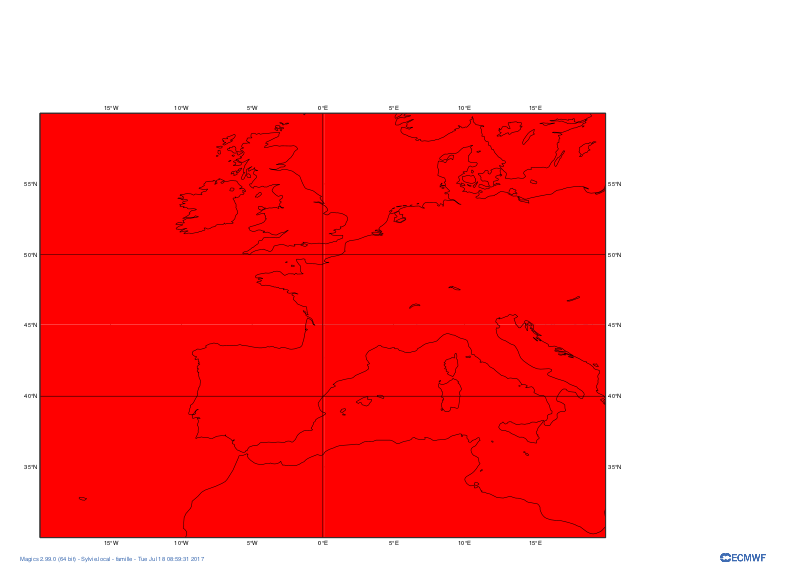

In [7]:
contour = magics.mcont(contour_line_colour = "red",
               contour_highlight_colour = "red",
               contour_highlight_thickness = 2,
               contour='off',
               contour_shade = 'on', 
                        contour_shade_technique = "grid_shading",
                       contour_shade_method = "area_fill")
magics.plot(area, coast, data, contour, magics.mcoast())

Nice, but what about a title ?

Easy, you can use an <a href='https://software.ecmwf.int/wiki/display/MAGP/Text+Plotting'> mtext object </a>.

By default, the text will be positioned at the top of your plot.

In [41]:
text = magics.mtext(text_lines = ["A Netcdf Data is plotted", "The plot is <font color='red'> red </font>"])

Add this new object to the plot command..

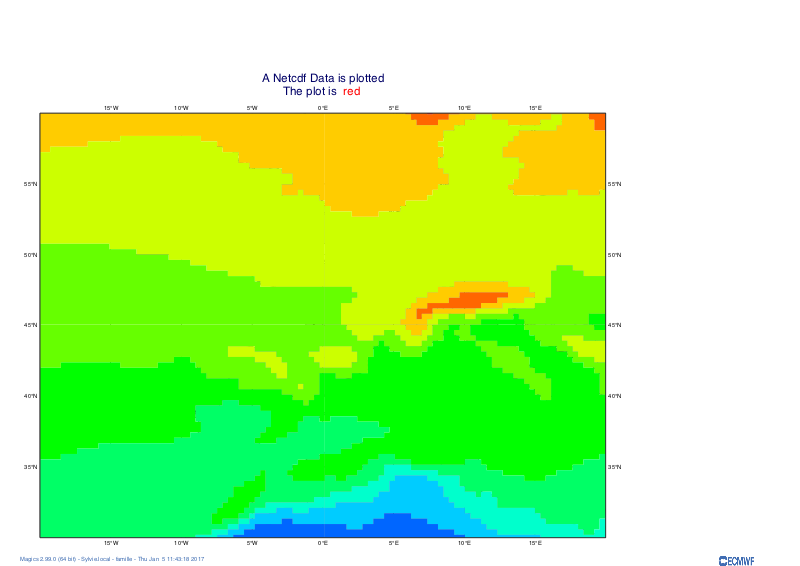

In [42]:
magics.plot(area, coast, data, contour, text)

Good, but what if you want to extract some information from the NetCDF data ?

Magics has a special tag <i>netcdf_info</i> that you can use to do that ..

Imagine you want to display the standard name and the units of your variable, you can redefine your text object


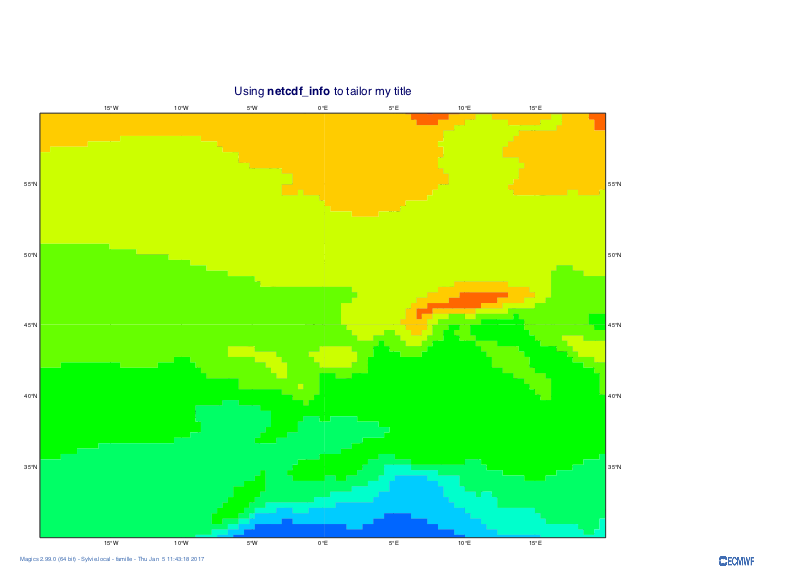

In [43]:
text = magics.mtext(text_lines = ["Using <b>netcdf_info</b> to tailor my title", 
              "The field <netcdf_info variable='t' attribute='standard_name'/> is displayed in <netcdf_info variable='t' attribute='units'/>"]
            )
magics.plot(area, coast, data, contour, text)

Let's now explore another functionality : 
The variable we are displaying has four dimensions. 
t(time, level, latitude, longitude)
The levels are 1000, 850, 500. 
By default Magics will 

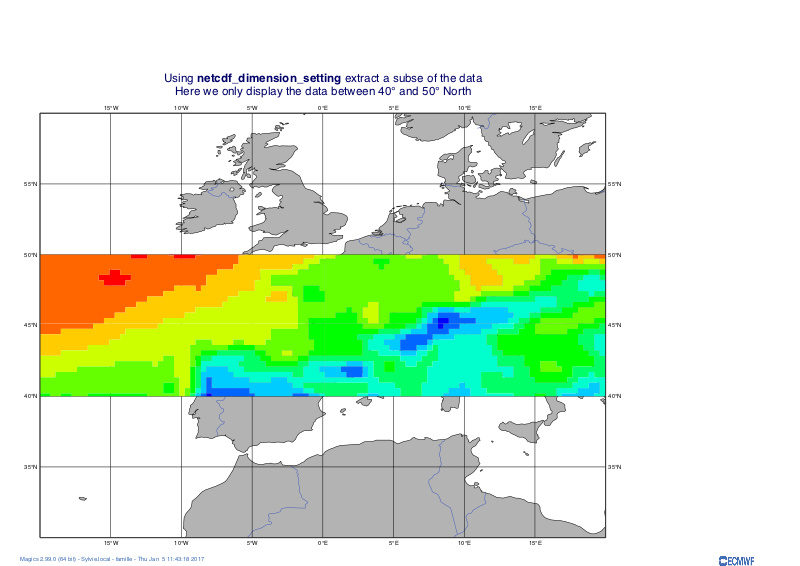

In [44]:
data = magics.mnetcdf(netcdf_type = "geomatrix",
  netcdf_filename = "data.nc",
  netcdf_value_variable = "t",
  netcdf_latitude_variable = "latitude",
  netcdf_longitude_variable = "longitude",
  netcdf_dimension_setting = ["latitude:40:50"]
)
text = magics.mtext(text_lines = ["Using <b>netcdf_dimension_setting</b> extract a subse of the data", 
              "Here we only display the data between 40&deg; and 50&deg; North"]
            )
magics.plot(area, coast, data, contour, text)

## Here trying the same with the toolbox 

### First , import the toolbox


In [45]:
import Magics.toolbox as toolbox

### Creating a geoplot
This will auotomatical set up a geographical view

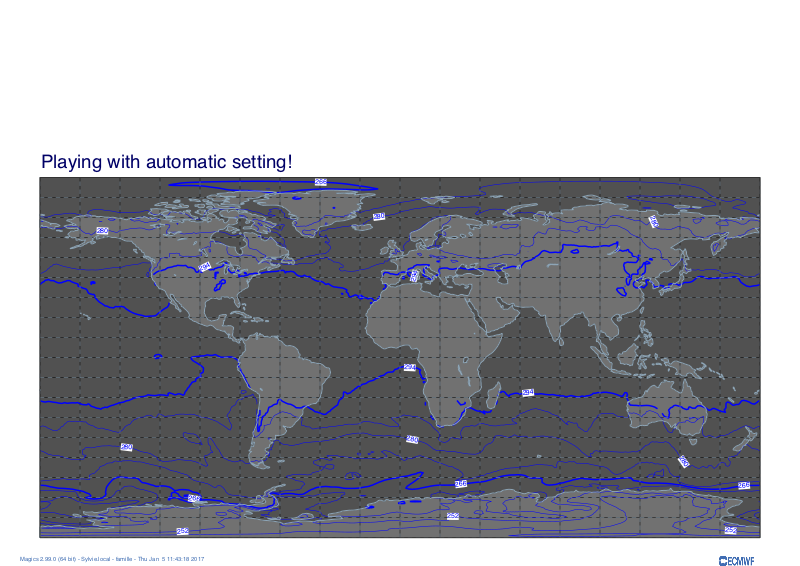

In [46]:

data = magics.mnetcdf(netcdf_type = "geomatrix",
  netcdf_filename = "data.nc",
  netcdf_value_variable = "t",
  netcdf_latitude_variable = "latitude",
  netcdf_longitude_variable = "longitude",
)

toolbox.geoplot(data, title = ["Playing with automatic setting!"])